En primer lugar, se tiene que cambiar la carpeta en la que se ejecuta el código. Esto se utiliza para que, a la hora de importar las librerias, el código sepa dónde está la carpeta src.

El siguiente bloque de codigo solo debe ser ejecutado una vez. El objetivo es que el print sea la carpeta raiz del repositorio

In [1]:
import os

current_folder = os.path.basename(os.getcwd())
if current_folder == "optimizaciones":
    os.chdir("..")
    print(os.getcwd())
else:
    print("Ya estás en la carpeta TRABAJO-DOM")

c:\Users\pablomaga\Documents\GitHub\Trabajo-DOM


Se importan las librerias

In [2]:
#### IMPORTAR LIBRERIAS ####
from src.models.car import Car # Modelo del coche
from src.models.track import Track # Modelo de la pista
from src.models.aero import Aero
from src.simulator.lap_simulator import LapSimulator # Simulador de vuelta

# Librerias para graficar
import matplotlib.pyplot as plt

# Librerias para el manejo de datos
import numpy as np

In [3]:
mass = 750               # kg, masa típica de un F1 en carrera
tire_grip = 1.8          # coeficiente de agarre elevado para neumáticos especializados
power = 750000           # W, potencia equivalente a unos 1000 CV aproximadamente
brake_force = 150000     # N, fuerza de frenado potente

fw_area = 1.7            # m², área del ala frontal
rw_area = 1.8            # m², área del ala trasera

cl_alpha_front = 0.3     # incremento de coeficiente de downforce por grado del ala frontal
cl_alpha_rear = 0.4      # incremento de coeficiente de downforce por grado del ala trasera
cd_alpha_front = 0.12     # incremento de coeficiente de resistencia aerodinámica del ala frontal
cd_alpha_rear = 0.1     # incremento de coeficiente de resistencia aerodinámica del ala trasera

Se definen, a continuacion, las caracteristicas aerodinamicas del coche. Esto son parámetros FIJOS, los que no cambian durante la optimización. Por otro lado, la manera de cambiar las cosas que se optimizan (que son los ángulos de ataque) se definen luego



In [4]:
aero = Aero(cl_alpha_front = cl_alpha_front, 
            cl_alpha_rear = cl_alpha_rear, 
            cd_alpha_front = cd_alpha_front, 
            cd_alpha_rear = cd_alpha_rear, 
            fw_area = fw_area, 
            rw_area = rw_area
        )

No obstante, si luego se quisiese cambiar alguno de estos parámetros, obviamente se podría. Solo habría que escribir lo siguiente:

```python
aero.fw_area = 1.7
```

Ahora, defines los parámetros del coche, incluso los que se van a optimizar

In [5]:
car = Car(mass = mass, 
          tire_grip = tire_grip, 
          power = power, 
          brake_force = brake_force, 
          aero = aero
        )

Lo único que se debe cambiar para llevar la optimización, es el valor del parámetro a optimizar. Por ejemplo, si quisiéramos optimizar (por algún motivo ilógico dada su trivialidad) la masa, solo habría que hacer lo siguiente:

In [6]:
print(f"Masa del coche: {car.mass} kg") 
car.mass = 800 # cambio de masa
print(f"Masa del coche: {car.mass} kg")

Masa del coche: 750 kg
Masa del coche: 800 kg


A pesar de que todos los parámetros se cambian haciendo 

```car.mass = 500``` o ```aero.fw_area = 2```

El ángulo de ataque, dado que provoca cambios en otros parámetros, se cambia de la siguiente forma:

```aero.set_aoa(5)```

In [7]:
aero.aoa_front = 15 # Establecer el ángulo de ataque
print(f"Angulo de ataque: {aero.aoa_front} grados")
print(f"Coeficiente de sustentación del alerón delantero: {aero.cl_front}")

aero.aoa_rear = 4 # Establecer el ángulo de ataque
print(f"Angulo de ataque: {aero.aoa_rear} grados")
print(f"Coeficiente de sustentación del alerón delantero: {aero.cl_rear}")

Angulo de ataque: 15 grados
Coeficiente de sustentación del alerón delantero: 4.5
Angulo de ataque: 4 grados
Coeficiente de sustentación del alerón delantero: 1.6


**Recapitulando**

Para cambiar los parámetros, se hace así:

In [8]:
car.mass = 800
aero.aoa_front = 4 # Establecer el ángulo de ataque

Para crear el circuito, se hace desde el archivo json

In [9]:
track = Track.from_json("track.json")

El simulador, finalmente, se hace creando el siguiente objeto

In [10]:
simulator = LapSimulator(car, track)

Para simular, simplemente se llama al siguiente metodo

In [14]:
lap_time, v = simulator.simulate_lap()

# Mostrar el resultado por pantalla
print(f"Tiempo de vuelta: {lap_time} s")

Tiempo de vuelta: 24.03165853428665 s


A la hora de optimizar, lo unico que se necesita hacer es crear una función que **envuelva** a lo que estamos optimizando. Esto se llama *wrapper*, y se hace de la siguiente forma

In [12]:
def f(aoa_front):
    aero.aoa_front = aoa_front
    lap_time, _ = simulator.simulate_lap()
    return lap_time


"""
De esta forma, f es una función que depende de solo el angulo de ataque.
Podemos usar scipy.optimize para encontrar el mínimo de f.
"""

resultado = f(13)  # Tiempo de vuelta con ángulo de ataque de 4 grados
print(resultado)

23.425562295632993


c:\Users\pablomaga\Documents\GitHub\Trabajo-DOM\src\models\car.py:74: RuntimeWarning: overflow encountered in scalar multiply
  vmax = (grip_force * radius / self.mass) ** 0.5


Finalmente, si se quiere hacer un plot del resultado de una configuracion, solo hay que usar el metodo ```plot_lap```. Si se quieren hacer varios plots juntos, solo hay que hacer el primer plot, cambiar el parámetro que se quiera cambiar, y hacer otro plot. ```label``` sirve para poner una etiqueta a cada vuelta y que se puedan distinguir

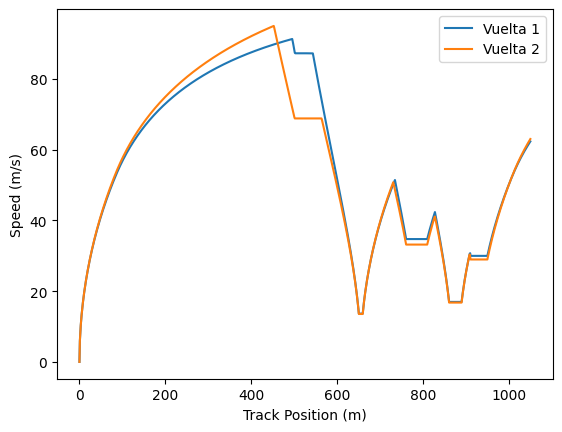

In [15]:
simulator.plot_lap(label="Vuelta 1")

car.aero.aoa_front = 0 # Establecer el ángulo de ataque

simulator.plot_lap(label="Vuelta 2")
plt.show()